## Cpature Hardware

```
Hardware: 
['Generic Settings', 'Scope Module', 'ChipWhisperer/OpenADC']
['ChipWhisperer/OpenADC Interface', 'connection', 'FTDI (SASEBO-W/SAKURA-G)']
['Generic Settings', 'Target Module', 'SAKURA G']
['Generic Settings', 'Target Frequency', '48M']
['Generic Settings', 'Trace Format', 'Numpy']
['Key/Text Pattern', 'Plaintext', 'Fixed']
['OpenADC', 'Trigger Setup', 'Total Samples', 400]
['OpenADC', 'Trigger Setup', 'Offset', 0]
['OpenADC', 'Gain Setting', 'Setting', 40]
['OpenADC', 'Trigger Setup', 'Mode', 'falling edge']
['OpenADC', 'Clock Setup', 'ADC Clock', 'Source', 'CLKGEN x1 via DCM']
```

## Analyzing Software

In [1]:
%load_ext version_information
%version_information numpy, scipy, matplotlib, sympy, version_information

Software versions
Python 2.7.11 64bit [MSC v.1500 64 bit (AMD64)]
IPython 4.0.3
OS Windows 7 6.1.7601 SP1
numpy 1.10.4
scipy 0.17.0
matplotlib 1.5.1
sympy 0.7.6.1
version_information 1.0.3
Thu Jun 23 15:08:49 2016 台北標準時間

In [2]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn; seaborn.set()

In [3]:
key = np.load('AES_8000t_data/traces/2016.06.16-14.41.00_knownkey.npy')

In [4]:
from chipwhisperer.common.utils.util import hexstr2list
keystr = "".join(["%02x "%k for k in key])
keydata = hexstr2list(keystr)

In [5]:
from chipwhisperer.analyzer.models.aes.key_schedule import keyScheduleRounds
totalrndstr = ""
for r in range(0, 10+1):
    result = keyScheduleRounds(keydata, 0, r)
    rstr = ["%02x" % t for t in result]
    print rstr
    if r == 10:
        roundkey = rstr
    #rstr = (delim[1] + delim[0]).join(rstr)
    #rstr = delim[0] + rstr
    #totalrndstr += rstr + "\n"

['00', '01', '02', '03', '04', '05', '06', '07', '08', 'f7', '15', '88', '09', 'cf', '4f', '3c']
['8b', '85', 'e9', '02', '8f', '80', 'ef', '05', '87', '77', 'fa', '8d', '8e', 'b8', 'b5', 'b1']
['e5', '50', '21', '1b', '6a', 'd0', 'ce', '1e', 'ed', 'a7', '34', '93', '63', '1f', '81', '22']
['21', '5c', 'b2', 'e0', '4b', '8c', '7c', 'fe', 'a6', '2b', '48', '6d', 'c5', '34', 'c9', '4f']
['31', '81', '36', '46', '7a', '0d', '4a', 'b8', 'dc', '26', '02', 'd5', '19', '12', 'cb', '9a']
['e8', '9e', '8e', '92', '92', '93', 'c4', '2a', '4e', 'b5', 'c6', 'ff', '57', 'a7', '0d', '65']
['94', '49', 'c3', 'c9', '06', 'da', '07', 'e3', '48', '6f', 'c1', '1c', '1f', 'c8', 'cc', '79']
['3c', '02', '75', '09', '3a', 'd8', '72', 'ea', '72', 'b7', 'b3', 'f6', '6d', '7f', '7f', '8f']
['6e', 'd0', '06', '35', '54', '08', '74', 'df', '26', 'bf', 'c7', '29', '4b', 'c0', 'b8', 'a6']
['cf', 'bc', '22', '86', '9b', 'b4', '56', '59', 'bd', '0b', '91', '70', 'f6', 'cb', '29', 'd6']
['e6', '19', 'd4', 'c4', '7d',

## Corr VS Traces

The traces is collected using the ``save correlation`` mode

In [6]:
a = np.load('AES_8000t_data/analysis/tempstats_20160616_160848.npy')

In [7]:
maxl = a[0]['maxlist']
data = a[0]['data']

enabledlist = []
for bnum in range(0, 16):
    enabledlist.append(bnum)

xrangelist = [0] * 256
newdata = [0] * 256 
for bnum in enabledlist:
    maxdata = maxl[bnum]
    tlist = []
    for m in maxdata:
        tlist.append(m['trace'])
    maxlist = np.zeros((len(data[bnum]), len(tlist)))
    for i, m in enumerate(maxdata):
        for j in range(0, len(data[bnum])):
            maxlist[m['maxes'][j][0], i] = m['maxes'][j][2]

    newdata[bnum] = maxlist
    xrangelist[bnum] = tlist

In [8]:
maxlist.shape

(256L, 80L)

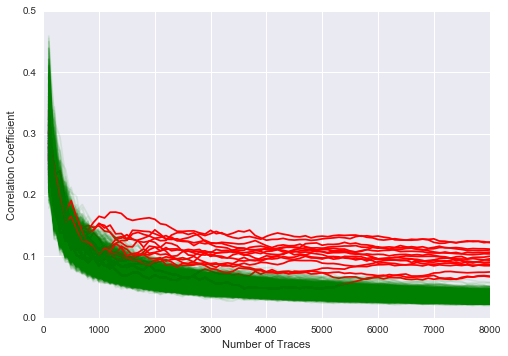

In [9]:
plt.xlabel('Number of Traces')
plt.ylabel('Correlation Coefficient')
for i in range(16):
    for j in range(256):
        if ("%0.2x" % j) == roundkey[i]:
            plt.plot(tlist, newdata[i][j], 'r')
        else:
            plt.plot(tlist, newdata[i][j], 'g', alpha=0.1)

## Output VS Time
We attack the last round of AES implementation using Hamming Distance model

In [10]:
samplepoint = a[0]['xrange']
data = a[0]['data']

In [11]:
len(samplepoint), len(data[0][0])

(256, 396)

In [ ]:
plt.xlabel('Sample Point')
plt.ylabel('Correlation Coefficient')
flag =[0]*16
for i in range(16):
    for j in range(256):
        if ("%0.2x" % j) == roundkey[i]:
            flag[i] = j;
        else:
            plt.plot(samplepoint[0],data[i][j], 'g', alpha=0.1)
for i in range(16):
    plt.plot(samplepoint[0],data[i][flag[i]], 'r')

## PGE VS Trace

The data is collecting using the ``save pge`` mode

In [ ]:
a = np.load('AES_8000t_data/analysis/tempstats_20160616_150458.npy')

In [ ]:
allpge = a[79]['pge']

In [ ]:
plt.xlabel('Trace Number')
plt.ylabel('Partial Gaussian Entropy')
for bnum in range(0, 16):
    trace = []
    pge = []
    for (tnum, plist) in allpge.iteritems():
        if plist[bnum]['pge'] is not None:
            trace.append(tnum)
            pge.append(plist[bnum]['pge'])
    plt.plot(trace, pge)